# Feature Engineering (MinTemperature)

In this step, this notebook will document the process used by the team to extract and derive features from RAW data. The common derived data sheds a light on,
- Spread and variance of data
- Averages, median, deviation etc.
- Time disparities of different souces of data
- Overall trends in data
- Correlations between features
etc.

## 1. Setup

In [20]:
# Imports
from PIL import Image
import numpy as np
import pandas as pd

In [21]:
# User Variables & Parameters
# Control Parameters
tmin_FileName           = 'tmin_'
tmin_DataPath           = '../../WaterBucket/data/isb/tmin/'
startYear               = 1961
endYear                 = 2018
numYears                = (endYear - startYear) + 1
fromMonth               = 1
toMonth                 = 12

# Processing Parameters
DF                      = pd.DataFrame()
filePathList            = []
fileIdentifier          = []
AVGList                 = []
MedianList              = []
MinList                 = []
MaxList                 = []
VarList                 = []
STDList                 = []

## 2. Reading Files

In [22]:
# Filename generation for batch processing
for y in range(startYear, endYear + 1):
    for m in range(fromMonth, toMonth + 1):

        # Handling case where month name is 01, 02, to 09
        monthName       = ''
        if m < 10:
            monthName   = '0' + str(m)
        else:
            monthName   = str(m)
        
        # Calculaing imagepath and searching if it exists on the system
        fileName        = tmin_FileName + str(y) + '-' + str(monthName) + '.tif'
        imagePath       = tmin_DataPath + fileName
        identifier      = str(monthName) + '-' + str(y)

        fileIdentifier.append(identifier)
        filePathList.append(imagePath)

In [23]:
# To ensure all filepaths and identifiers are generated correctly
# print(filePathList, fileIdentifier)

### 3. Feature Derivation

In [24]:
for filePath in filePathList:

    # Loading in files one by one
    currentFile         = Image.open(filePath)
    print("Working on: ", filePath)

    # Making derived variables
    npFile              = np.array(currentFile)
    AVGList.append(np.nanmean(npFile))
    MedianList.append(np.nanmedian(npFile))
    MinList.append(np.nanmin(npFile))
    MaxList.append(np.nanmax(npFile))
    VarList.append(np.nanvar(npFile))
    STDList.append(np.nanstd(npFile))

Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-01.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-02.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-03.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-04.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-05.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-06.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-07.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-08.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-09.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-10.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-11.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1961-12.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1962-01.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1962-02.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1962-03.tif
Working on:  ../../WaterBucket/data/isb/tmin/tmin_1962-04.tif
Working 

In [25]:
DF['tmin_FileName']             = fileIdentifier
DF['tmin_AverageValues']        = AVGList
DF['tmin_MedianValues']         = MedianList
DF['tmin_MinValues']            = MinList
DF['tmin_MaxValues']            = MaxList
DF['tmin_Variance']             = VarList
DF['tmin_StandardDeviation']    = STDList

In [26]:
DF

,tmin_FileName,tmin_AverageValues,tmin_MedianValues,tmin_MinValues,tmin_MaxValues,tmin_Variance,tmin_StandardDeviation
0,01-1961,3.568882,3.940812,-2.369816,5.351521,1.375778,1.172936
1,02-1961,3.501463,4.147435,-4.175918,5.096167,2.636834,1.623833
2,03-1961,9.606311,10.297916,1.172522,11.751247,3.656169,1.912111
3,04-1961,13.917492,14.778236,5.852190,16.238865,3.986549,1.996634
4,05-1961,19.007034,20.036194,10.216407,21.547274,5.345192,2.311967
...,...,...,...,...,...,...,...
691,08-2018,23.454491,24.432930,15.975805,25.898272,4.386900,2.094493
692,09-2018,20.049519,20.949347,12.541241,22.511889,4.191809,2.047391
693,10-2018,13.599517,14.128031,7.604353,15.617704,2.155366,1.468117
694,11-2018,7.502071,7.694304,2.900816,9.641233,0.917560,0.957893


<AxesSubplot:>

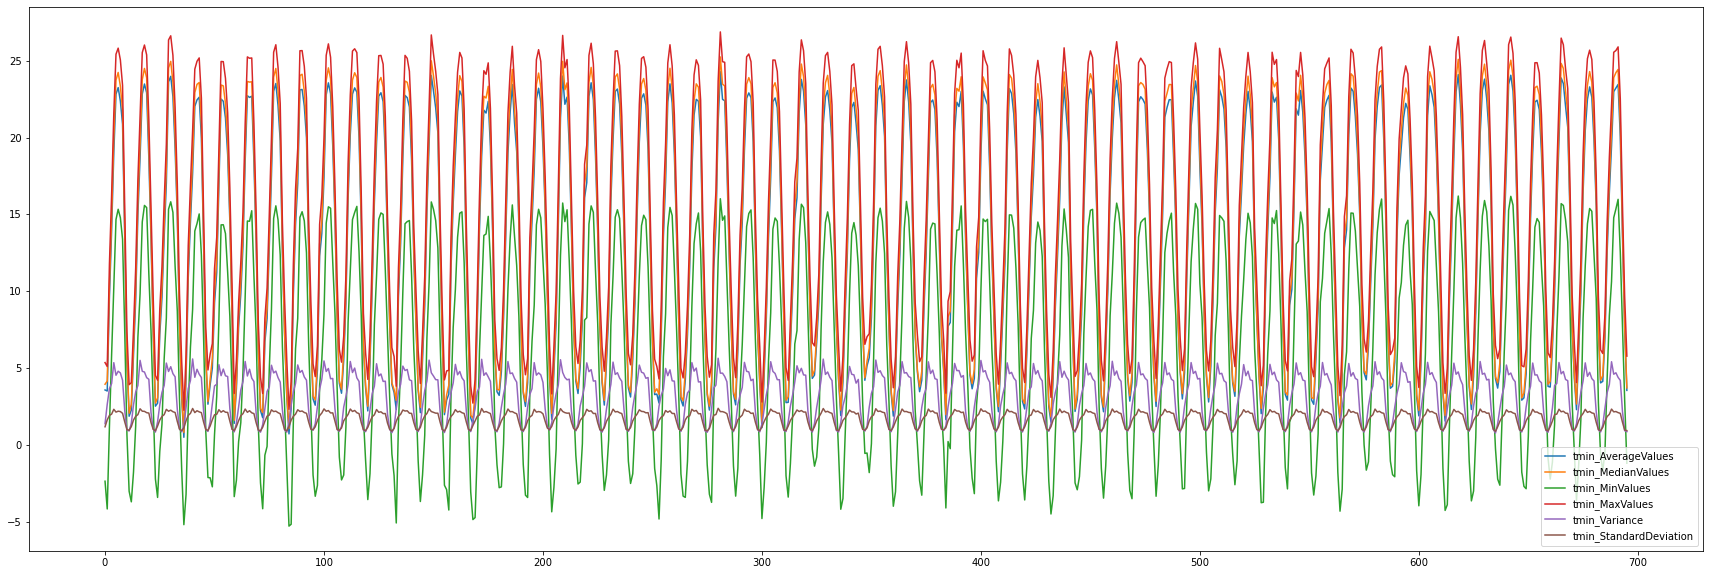

In [27]:
DF.plot.line(figsize=((30,10)))

In [28]:
pd.DataFrame.to_csv(DF, '../output/tmin_ISB.csv')